# İş Problemi:

Bir perakende şirketi, müşteri verilerini kullanarak müşteri segmentasyonunu gerçekleştirmek ve gelecekteki satışlarını tahmin etmek istiyor. Şirket, bu analizlerle pazarlama stratejilerini geliştirmeyi ve müşteri memnuniyetini artırmayı hedefliyor.

# Veri Seti:

Online Retail II Data Set (Kaggle): https://www.kaggle.com/datasets/mathchi/online-retail-ii-data-set-from-ml-repository

# Görevler ve Sorular:
### 1.Veri Keşfi ve Ön İşleme:

•
Veri setini keşfedin ve veriyi temizlemek, eksik verileri ele almak ve gerekli ön işlemleri yapmak için adımlar atın.

•
Veri setindeki önemli özellikleri (features) belirleyin ve açıklayın. Bu özellikler müşteri segmentasyonu ve satış tahmini için neden önemlidir?

### 2.Müşteri Segmentasyonu:

•
Müşteri segmentasyonu için uygun bir algoritma seçin.

•
Segmentasyon sonuçlarını görselleştirin ve her segmentin özelliklerini açıklayın.

•
Hangi segmentlere odaklanarak pazarlama stratejileri geliştirilmesi gerektiğini ve nedenini açıklayın.

### 3.Satış Tahmini:

•
Satış tahmini için uygun bir makine öğrenimi modeli seçin.

•
Modeli eğitin ve test edin, performansını değerlendirin.

•
Modelin sonuçlarını görselleştirin ve yorumlayın. Hangi faktörler satışları en çok etkiliyor?

### 4.Sonuçların Sunumu:

•
Analiz sürecinizi ve bulgularınızı özetleyen bir sunum hazırlayın.

•
İş problemini nasıl çözdüğünüzü ve elde ettiğiniz sonuçların iş değeri açısından nasıl kullanılabileceğini açıklayın.

•
Önerilerinizi ve gelecekte yapılabilecek analiz ve geliştirme önerilerini belirtin.

# Beklentiler:
Kodunuzu Google Colab üzerinde paylaşın.

Verdiğiniz cevapları içeren bir sunum dosyası hazırlayın (PowerPoint, PDF vb.).

---

Libraries:

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
#from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow import keras

Reading datas:

In [4]:
df_2009_2010 = pd.read_csv('Year 2009-2010.csv', encoding='latin1')
df_2010_2011 = pd.read_csv('Year 2010-2011.csv', encoding='latin1')

In [5]:
df_2009_2010

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [6]:
df_2010_2011[22500:]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
22500,538171,21908,CHOCOLATE THIS WAY METAL SIGN,2,12/9/2010 20:01,2.10,17530.0,United Kingdom
22501,538171,21905,MORE BUTTER METAL SIGN,1,12/9/2010 20:01,2.10,17530.0,United Kingdom
22502,538171,21989,PACK OF 20 SKULL PAPER NAPKINS,2,12/9/2010 20:01,0.85,17530.0,United Kingdom
22503,538171,22837,HOT WATER BOTTLE BABUSHKA,2,12/9/2010 20:01,4.65,17530.0,United Kingdom
22504,538171,85152,HAND OVER THE CHOCOLATE SIGN,3,12/9/2010 20:01,2.10,17530.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


Merging two Dataframe:

In [7]:
merged_df = pd.concat([df_2009_2010, df_2010_2011[22500:]])
merged_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [8]:
print(merged_df.isnull().sum())

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235287
Country             0
dtype: int64


In [9]:
merged_df = merged_df.dropna(subset=['Customer ID'])
merged_df = merged_df[merged_df['Quantity'] > 0]
merged_df = merged_df[merged_df['Price'] > 0]
merged_df['InvoiceDate'] = pd.to_datetime(merged_df['InvoiceDate'])
#Creating Total Spending Column:
merged_df['TotalPrice'] =merged_df['Quantity'] * merged_df['Price']
merged_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0


In [36]:
merged_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


Aggregate Data by Customer ID:

In [10]:
# RFM (Recency, Frequency, Monetary) tabanlı özellikler 
df_rfm = merged_df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (merged_df['InvoiceDate'].max() - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})
df_rfm.columns = ['Recency', 'Frequency', 'Monetary']

Apply K-means Clustering:

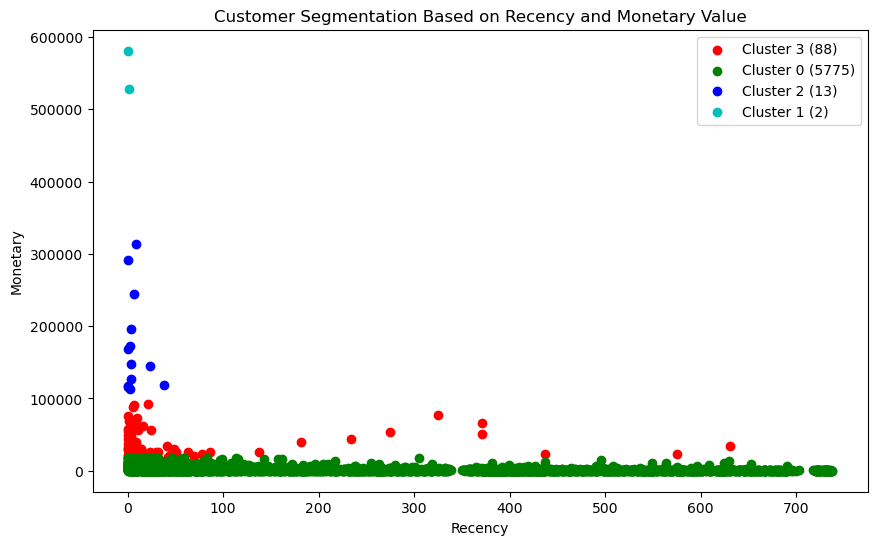

In [144]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_rfm['Cluster'] = kmeans.fit_predict(df_rfm)

# Kümeler ve renkler
clusters = df_rfm['Cluster'].unique()
colors = ['r', 'g', 'b', 'c']
cluster_colors = {cluster: colors[i] for i, cluster in enumerate(clusters)}

# Scatter plot
plt.figure(figsize=(10, 6))
for cluster in clusters:
    clustered_data = df_rfm[df_rfm['Cluster'] == cluster]
    plt.scatter(clustered_data['Recency'], clustered_data['Monetary'], 
                c=cluster_colors[cluster], label=f'Cluster {cluster} ({len(clustered_data)})')

plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation Based on Recency and Monetary Value')
plt.legend()
plt.show()

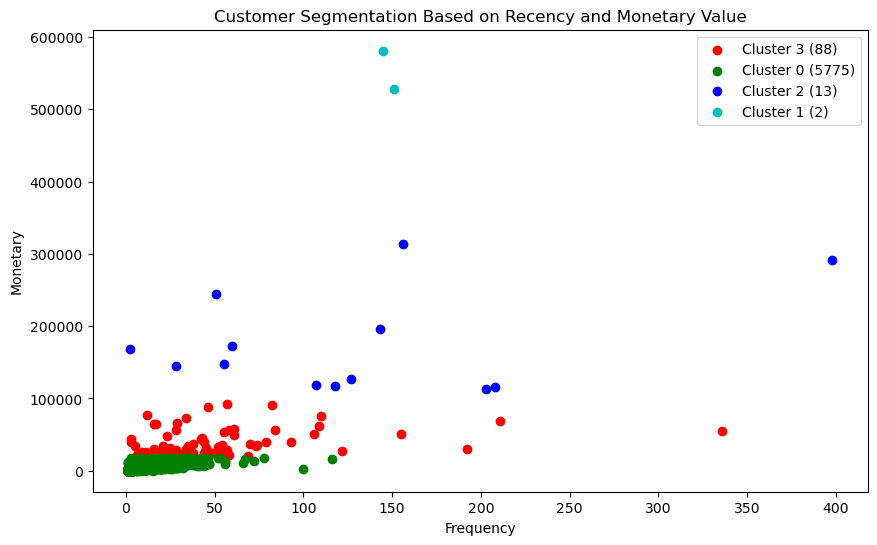

In [147]:
# Scatter plot
plt.figure(figsize=(10, 6))
for cluster in clusters:
    clustered_data = df_rfm[df_rfm['Cluster'] == cluster]
    plt.scatter(clustered_data['Frequency'], clustered_data['Monetary'], 
                c=cluster_colors[cluster], label=f'Cluster {cluster} ({len(clustered_data)})')

plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation Based on Recency and Monetary Value')
plt.legend()
plt.show()

#### Segment Analizi:

Cluster 0: Yeni müşteriler.

Cluster 1: Sadık müşteriler.

Cluster 2: Potansiyel kaybedilen müşteriler.

Cluster 3: Yüksek harcama yapan müşteriler.

Based on the clustering analysis, we can see that most of the sales fall within the cost range of 0 to 200,000, with the total number of transactions ranging from 0 to 200. Additionally, we can identify that customers represented by the green cluster are our best customers.

---

Satış Tahmini:

/Users/sahandhassani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sahandhassani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


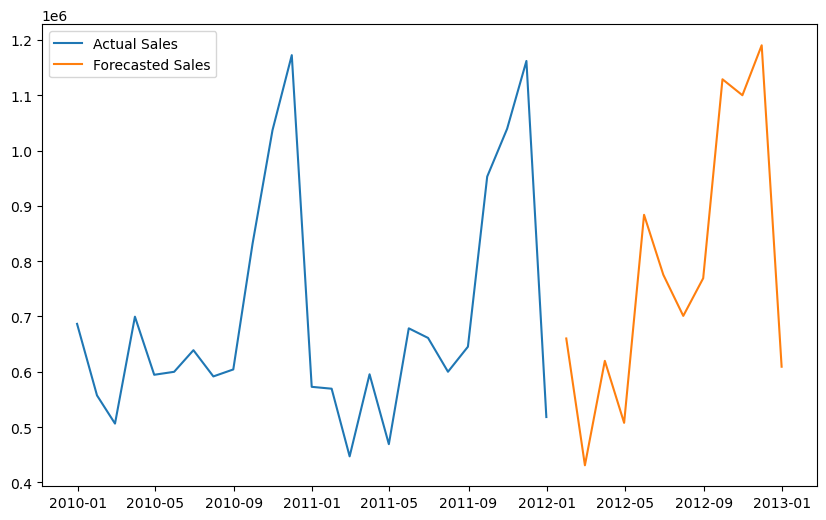

In [193]:
#from statsmodels.tsa.arima.model import ARIMA
df_sales = merged_df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

model = ARIMA(df_sales, order=(13,2, 3))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(10, 6))
plt.plot(df_sales, label='Actual Sales')
plt.plot(forecast, label='Forecasted Sales')
plt.legend()
plt.show()


Epoch 1/20
290/290 [==============================] - 3s 6ms/step - loss: 0.0081
Epoch 2/20
290/290 [==============================] - 2s 6ms/step - loss: 0.0076
Epoch 3/20
290/290 [==============================] - 2s 6ms/step - loss: 0.0070
Epoch 4/20
290/290 [==============================] - 2s 6ms/step - loss: 0.0064
Epoch 5/20
290/290 [==============================] - 2s 6ms/step - loss: 0.0062
Epoch 6/20
290/290 [==============================] - 2s 6ms/step - loss: 0.0056
Epoch 7/20
290/290 [==============================] - 2s 6ms/step - loss: 0.0057
Epoch 8/20
290/290 [==============================] - 2s 6ms/step - loss: 0.0059
Epoch 9/20
290/290 [==============================] - 2s 6ms/step - loss: 0.0054
Epoch 10/20
290/290 [==============================] - 2s 6ms/step - loss: 0.0054
Epoch 11/20
290/290 [==============================] - 2s 6ms/step - loss: 0.0052
Epoch 12/20
290/290 [==============================] - 2s 6ms/step - loss: 0.0055
Epoch 13/20
290/290 [====

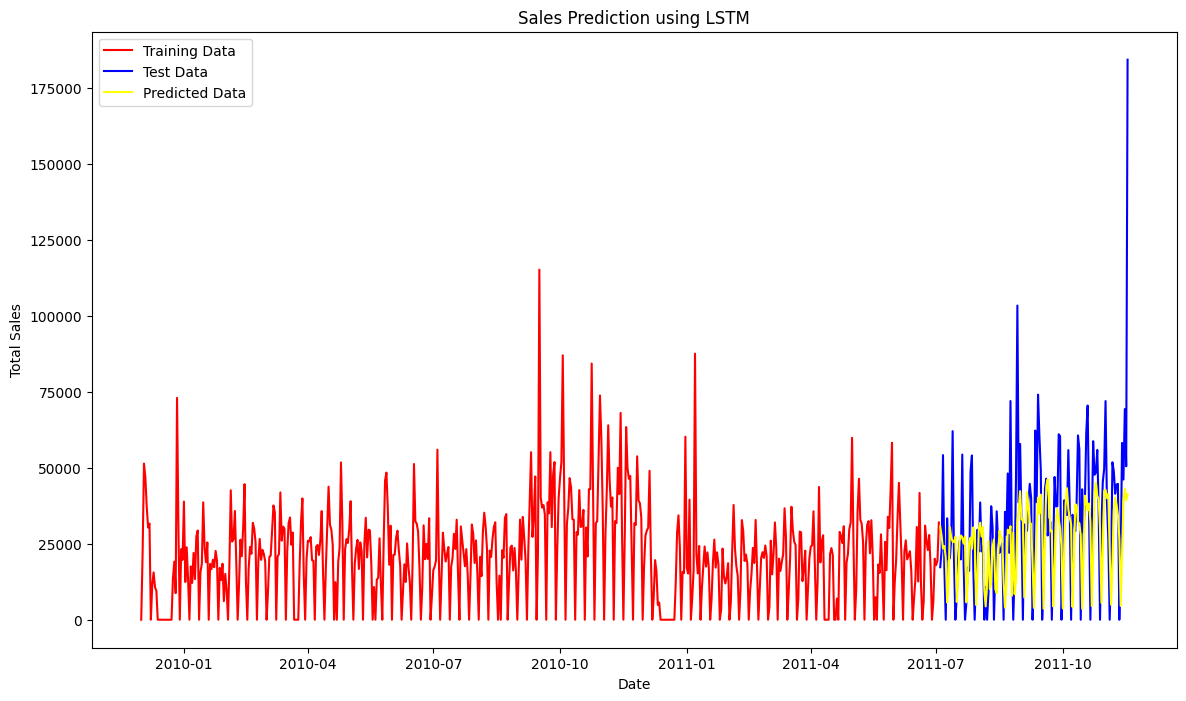

In [35]:
df_sales = merged_df.set_index('InvoiceDate').resample('D')['TotalPrice'].sum().fillna(0)

# Veriyi ölçeklendirin
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_sales.values.reshape(-1, 1))

# Eğitim ve test veri setlerini ayırın
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Eğitim veri seti için özellikler ve hedefler oluşturun
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Veriyi LSTM için yeniden şekillendirin
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM modelini oluşturun


model = keras.models.Sequential([
    keras.layers.LSTM(units = 256,
                      input_shape = (time_step, 1)),
    keras.layers.Dense(units = 128, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 64, activation = "relu"),
    keras.layers.Dense(units = 64, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 16, activation = "relu"),
    keras.layers.Dense(units = 1)
])

# Modeli derleyin ve eğitin
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=2, epochs=20)

# Tahminleri yapın
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Tahminleri geri ölçeklendirin
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Sonuçları görselleştirin
train_actual = scaler.inverse_transform(train_data[time_step + 1:].reshape(-1, 1))
test_actual = scaler.inverse_transform(test_data[time_step + 1:].reshape(-1, 1))

plt.figure(figsize=(14, 8))
plt.plot(df_sales.index[:len(train_actual)], train_actual, label='Training Data', color='red')
plt.plot(df_sales.index[len(train_actual):len(train_actual) + len(test_actual)], test_actual, label='Test Data', color='blue')
plt.plot(df_sales.index[len(train_actual):len(train_actual) + len(test_predict)], test_predict, label='Predicted Data', color='yellow')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Prediction using LSTM')
plt.legend()
plt.show()